<a href="https://colab.research.google.com/github/xinn2/deeplearning/blob/main/p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Practical 2 - Building your first neural network
---

## Author : Amir Atapour-Abarghouei, amir.atapour-abarghouei@durham.ac.uk

This notebook will provide you with an excercise to practice building a simple nerual network.

Copyright (c) 2022 Amir Atapour-Abarghouei, UK.

License : LGPL - http://www.gnu.org/licenses/lgpl.html

For the first excercise, we will be using SVHN dataset.

As mentioned in [the dataset's website](http://ufldl.stanford.edu/housenumbers/), the Street View House Numbers (SVHN) Dataset can be seen as similar in flavour to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

In this practical, most elements of our code is missing. Your task is to complete the code.

First, let's import what we need and set Torch to use the GPU:

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

device = torch.device('cuda')
print('done!')

done!


Now let's load the data:

In [21]:
train_dataset = torchvision.datasets.SVHN('data', split='train', download=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(32),
        torchvision.transforms.ToTensor()
    ]))

test_dataset = torchvision.datasets.SVHN('data', split='test', download=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize(32),
        torchvision.transforms.ToTensor()
    ]))
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=256, drop_last=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512, drop_last=True)

print(f"There are {len(train_dataset)} images in the training set!")
print(f"There are {len(test_dataset)} images in the test set!")

Using downloaded and verified file: data/train_32x32.mat
Using downloaded and verified file: data/test_32x32.mat
There are 73257 images in the training set!
There are 26032 images in the test set!


Tweak the parameters of the cell above (e.g. batch_size) as needed.

We can already see that this dataset is much larger than MNIST and will be more challenging. Let's look at a few of our images:

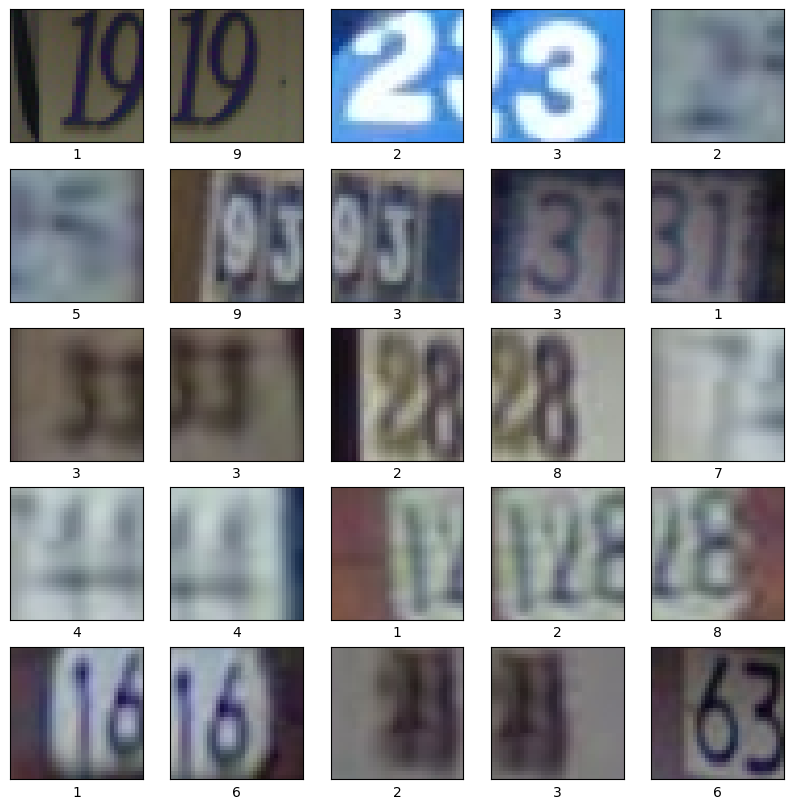

In [22]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_loader.dataset[i][0].permute(0,2,1).contiguous().permute(2,1,0), cmap=plt.cm.binary)
    plt.xlabel(classes[train_loader.dataset[i][1]])

Now, we are getting to the good part. We want to build our neural network.

Have a look at this tutorial, which should help you with how PyTorch supports building neural networks:

[https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

Construct a neural network, using the which:
- Has three Layers
- Layer 1 is a Dense layer that recieves the input image flattened as a vector with a ReLU activation. Think about what the size of the input should be (i.e. how many neurons the network should have)
- Layer 2 is a Dense layer with 512 neurons and ReLU activation
- Layer 3 is a Dense layer that predicts what class the input belongs to

In [23]:
class SimpleMLP(nn.Module):
  # def __init__(self):
  #       super(SimpleMLP, self).__init__()
  #       self.flatten = nn.Flatten()
  #       self.linear_relu_stack = nn.Sequential(
  #           nn.Linear(3072, 512),
  #           nn.ReLU(),
  #           nn.Linear(512, 512),
  #           nn.ReLU(),
  #           nn.Linear(512, 10),
  #       )

  # def forward(self, x):
  #     x = self.flatten(x)
  #     logits = self.linear_relu_stack(x)
  #     return logits

  def __init__(self):
      super(SimpleMLP, self).__init__()
      self.l1 = nn.Linear(in_features=3072, out_features=512)
      self.l2 = nn.Linear(in_features=512, out_features=10)

  def forward(self, x):
      x = self.l1(x)
      x = torch.nn.functional.relu(x)
      x = self.l2(x)
      return x


Now, let's create the model and the optimiser:

In [24]:
model = SimpleMLP().to(device)

optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
print(optimiser)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


We also need a loss function. Given that our problem is a classification one, which loss function do you think is most suitable?

These haven't been covered in depth in the lectures, but take a look at these resources:

https://pytorch.org/docs/stable/nn.html#loss-functions

https://neptune.ai/blog/pytorch-loss-functions

Complete the code below:

In [25]:
criterion = nn.CrossEntropyLoss()

Now we are ready to start training. Some portion of the main loop has been completed for you but you will need to fill in the rest.

You might find this tutorial useful:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [26]:
epoch = 0
# training loop
# train the model for 20 epochs:
while (epoch < 20):

    # iterate over the training dateset
    for i, batch in enumerate(train_loader):

        # sample x from the dataset
        x, t = batch
        x, t = x.to(device), t.to(device)

        # forward + backward + optimize
        x = x.view(x.size(0), -1)
        output = model(x)
        loss = criterion(output, t)
        model.zero_grad()
        loss.backward()
        optimiser.step()

        # ....
        # complete the training
        # make sure you log and print the losses as well
        # ....

    _, argmax = torch.max(output, dim=1)
    accuracy = argmax.eq(t).float().mean() * 100

    print(f'loss: {loss.item()} - accuracy: {accuracy}')

    epoch += 1

loss: 2.197404384613037 - accuracy: 21.875
loss: 1.9768694639205933 - accuracy: 26.953125
loss: 1.8340485095977783 - accuracy: 37.890625
loss: 1.6967604160308838 - accuracy: 39.0625
loss: 1.5994091033935547 - accuracy: 44.140625
loss: 1.5355452299118042 - accuracy: 50.78125
loss: 1.4316835403442383 - accuracy: 48.046875
loss: 1.5312018394470215 - accuracy: 50.390625
loss: 1.4266799688339233 - accuracy: 54.296875
loss: 1.3343260288238525 - accuracy: 58.984375
loss: 1.4627984762191772 - accuracy: 53.515625
loss: 1.166955828666687 - accuracy: 64.84375
loss: 1.1569880247116089 - accuracy: 62.5
loss: 1.2728188037872314 - accuracy: 59.765625
loss: 1.192516803741455 - accuracy: 64.84375
loss: 1.1463583707809448 - accuracy: 63.671875
loss: 1.3538000583648682 - accuracy: 59.765625
loss: 1.244875192642212 - accuracy: 58.984375
loss: 1.1842970848083496 - accuracy: 61.328125
loss: 1.1750743389129639 - accuracy: 62.109375


You can take inspiration from the lecture material here:

https://github.com/atapour/dl-pytorch/blob/main/4.Classifier/4_PyTorch_Programming_Classifier.ipynb

and plot the loss curves live to see how the model is training. You can also draw the loss curves using [matplotlib](https://matplotlib.org/) or [Weights and Biases](https://wandb.ai), as we learned in the lecture today.

What should the loss cureve look like? Does the loss curve you have plotted look as expected?

When the training is complete, it is time to test the model. Complete the main testing looop as well:

In [27]:
from statistics import mean
# since we are not training anything, we don't need gradients:
with torch.no_grad():

  test_losses = []
  test_accuracies = []

  # iterate over the testing dateset
  for i, batch in enumerate(test_loader):

    # sample x from the dataset
    x, t = batch
    x, t = x.to(device), t.to(device)

    # ....
    # complete the testing loop
    # make sure you log and print the accuracy as well
    # ....
    # if you have are having trouble calculating and logging accuracy,
    # you might want to take inspiration from the lecture material:
    # https://github.com/atapour/dl-pytorch/blob/29652b1cf93222b50065be4498bd744dfae3fba3/4.Classifier/4_pytorch_programming_classifier.py
    # the best way to learn code is to look at other code
    # ....
    x = x.view(x.size(0), -1)
    output = model(x)
    test_loss = criterion(output, t)

    _, argmax = torch.max(output, dim=1)
    test_accuracy = argmax.eq(t).float().mean() * 100

    test_losses.append(test_loss.item())
    test_accuracies.append(test_accuracy.item())

    print(f'losses: {mean(test_losses)}')
    print(f'accuracies: {mean(test_accuracies)}')

losses: 1.4757490158081055
accuracies: 55.2734375
losses: 1.4708352088928223
accuracies: 54.39453125
losses: 1.4796322584152222
accuracies: 54.036458333333336
losses: 1.4603278040885925
accuracies: 54.541015625
losses: 1.455588984489441
accuracies: 54.53125
losses: 1.4547064701716106
accuracies: 55.013020833333336
losses: 1.429815309388297
accuracies: 55.46875
losses: 1.4240358471870422
accuracies: 55.56640625
losses: 1.4179016616609361
accuracies: 55.46875
losses: 1.4203127861022948
accuracies: 55.3515625
losses: 1.4264574159275403
accuracies: 55.14914772727273
losses: 1.4260999858379364
accuracies: 55.37109375
losses: 1.430859850003169
accuracies: 55.31850961538461
losses: 1.4331764919417245
accuracies: 55.343191964285715
losses: 1.432730770111084
accuracies: 55.15625
losses: 1.43456219881773
accuracies: 55.126953125
losses: 1.433536964304307
accuracies: 55.181525735294116
losses: 1.4364071024788752
accuracies: 55.06727430555556
losses: 1.4323405403839915
accuracies: 55.0884046052631

What is the accuracy level you are getting?

If you have the time, go back to the cell where we created the model and change the architecture to see what difference it can make.

You can start experimenting with Convolutional layers:
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html